<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/Statistics-and-Machine-Learning/blob/main/C1_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application of Statistics**

**Healthcare: Clinical Trials**
"This example demonstrates hypothesis testing in the context of clinical trials to determine the efficacy of a new drug compared to a placebo. We use an independent samples t-test to compare the effectiveness scores from two groups. If the p-value is less than 0.05, it suggests significant differences, indicating the drug's potential efficacy."

In [ ]:
import scipy.stats as stats

# Sample data: Drug vs Placebo
drug_effectiveness = [62, 60, 67, 55, 58]
placebo_effectiveness = [45, 40, 50, 43, 47]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(drug_effectiveness, placebo_effectiveness)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 5.837354935557555
P-value: 0.00038830752430204954


**Healthcare: Survival Analysis**
"In this cell, we perform survival analysis using the Kaplan-Meier estimator, which is a non-parametric statistic used to estimate the survival function from lifetime data. In this context, we analyze the time until a particular event (e.g., death) occurs. The output plot shows the survival function over time."

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c65fbc7037b2d0497319a282c6cebf74fe811a6c7371b92c2586cc74f9cf2506
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


Survival function at specific times:           KM_estimate
timeline             
0.0          1.000000
2.5          0.833333
4.0          0.500000
5.0          0.333333
6.0          0.333333


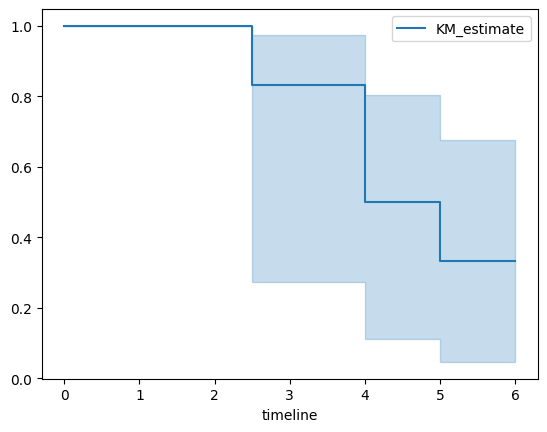

In [ ]:
from lifelines import KaplanMeierFitter

# Sample data
durations = [5, 6, 6, 2.5, 4, 4]
event_observed = [1, 0, 0, 1, 1, 1]  # 1 if event/death observed, 0 if censored

kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed)

# Plot survival function
kmf.plot_survival_function()
print("Survival function at specific times:", kmf.survival_function_.head())


**Finance: Cryptocurrency Analysis** :"This code snippet demonstrates the use of ARIMA models to analyze time series data of cryptocurrency prices. The goal is to model price fluctuations over time, allowing predictions about future prices based on past trends. The summary from the ARIMA model provides detailed statistics about the model's performance."

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ensure the data is numeric and contains no missing values
price_data = pd.Series([45500, 46000, 46500, 45000, 44500, 46000, 47000], dtype=float)

# Check if any values are missing
if price_data.isna().any():
    print("Data contains NaNs. Please fill or remove.")
else:
    # Fit an ARIMA model
    model = ARIMA(price_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Summary of the model
    print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -49.931
Date:                Wed, 21 Aug 2024   AIC                            105.862
Time:                        08:45:01   BIC                            105.237
Sample:                             0   HQIC                           103.361
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1131      4.605      0.025      0.980      -8.912       9.138
ma.L1         -0.0889      4.782     -0.019      0.985      -9.462       9.284
sigma2      9.882e+05   1.09e+06      0.906      0.3

**Finance: Risk Assessment**
"Here, we calculate the Value at Risk (VaR) for a portfolio using historical returns data. VaR is a statistical measure that estimates the level of financial risk within a firm or investment portfolio over a specific time frame. The result shows the maximum expected loss at a 95% confidence level over the given data period."

In [ ]:
import numpy as np

# Sample returns data
returns = np.random.normal(0.05, 0.1, 100)  # mean, std, number of points

# Calculate Value at Risk (VaR) at 95% confidence level
VaR_95 = np.percentile(returns, 5)
print("Value at Risk (95% confidence):", VaR_95)


Value at Risk (95% confidence): -0.1240051035930233


**Blockchain: Fraud Detection**
"In this example, we analyze transaction data to detect potential frauds or anomalies using a simple statistical approach. By applying the 3 standard deviations rule, we identify transactions that are unusually large compared to typical transaction sizes, which could indicate fraudulent activity."

In [ ]:
import numpy as np

# Simulated transaction amounts
transactions = np.random.exponential(scale=2, size=1000)  # Scale is average transaction size

# Detect outliers using 3 standard deviations rule
mean_trans = np.mean(transactions)
std_trans = np.std(transactions)

outliers = [x for x in transactions if x > mean_trans + 3 * std_trans]
print("Detected outliers:", outliers)


Detected outliers: [19.849638955554628, 9.63929039911661, 12.789824762491095, 13.420318988228304, 7.6244768538893135, 7.9404783163235235, 13.420805082668627, 9.094597244346177, 8.69093493619807, 8.453076964592992, 7.525273579344735, 8.967589735579685, 9.529376922866367, 9.13826677600747, 9.11119622623604, 8.002084085654122]


**Blockchain: Consensus Algorithms**

"This code illustrates how to model the probability of achieving consensus in a blockchain network using a simple probability calculation. The scenario considers a network where each node independently agrees to a new block with a certain probability. We calculate the likelihood that the required level of agreement is met."

In [ ]:
# Simple probability model for decision making in a blockchain consensus
def consensus_prob(num_nodes, required=0.6):
    from scipy.stats import binom
    # Probability of a node agreeing
    prob_agree = 0.8
    # Calculate the probability of achieving required consensus
    prob_consensus = 1 - binom.cdf(k=int(required * num_nodes), n=num_nodes, p=prob_agree)
    return prob_consensus

# Example: Probability of consensus with 10 nodes
print("Probability of achieving consensus:", consensus_prob(10))


Probability of achieving consensus: 0.8791261184000001


**Introduction to Infrared (IR) Spectroscopy**
Infrared (IR) Spectroscopy is a vital analytical technique used to identify substances and investigate chemical compositions based on how molecules absorb infrared light. Different molecular bonds absorb characteristic wavelengths of infrared radiation, creating unique spectral fingerprints. This method is widely used for qualitative analysis in various fields such as chemistry, material science, and pharmaceuticals.

**Benefits of Synthetic Data Generation for IR Spectroscopy**
Generating synthetic IR spectroscopy data is beneficial for testing and developing analytical algorithms, training machine learning models, and educational purposes when real data is unavailable or expensive to obtain. The code provided simulates a realistic IR spectrum using Gaussian functions to represent absorption peaks and includes noise to mimic real measurement conditions. By studying these synthetic spectra, researchers can enhance their understanding and interpretation skills without the immediate need for laboratory resources.

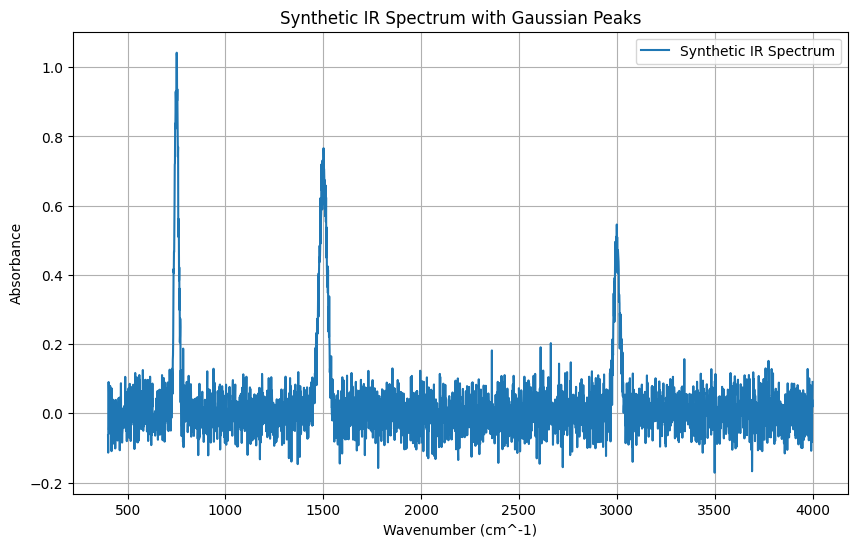

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, amplitude, mean, stddev):
    """Returns a Gaussian (normal distribution) curve."""
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Parameters for synthetic data generation
wavenumbers = np.linspace(400, 4000, 3600)  # Simulated range of wavenumbers from 400 to 4000 cm^-1
peaks = [
    {'amplitude': 1.0, 'mean': 750, 'stddev': 10},   # Example peak at 750 cm^-1
    {'amplitude': 0.7, 'mean': 1500, 'stddev': 20},  # Example peak at 1500 cm^-1
    {'amplitude': 0.5, 'mean': 3000, 'stddev': 15},  # Example peak at 3000 cm^-1
]

# Generate synthetic spectrum by adding Gaussian peaks
spectrum = np.zeros_like(wavenumbers)
for peak in peaks:
    spectrum += gaussian(wavenumbers, **peak)

# Adding random noise to the spectrum
noise = np.random.normal(0, 0.05, spectrum.shape)
spectrum += noise

# Plotting the synthetic spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, spectrum, label='Synthetic IR Spectrum')
plt.title('Synthetic IR Spectrum with Gaussian Peaks')
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.legend()
plt.grid(True)
plt.show()
